## Regularized Logistic Regression

In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
file = pd.read_csv('../ML/Datasets/synthetic.csv')
x1 = file['test1'].values
x2 = file['test2'].values
y = file['result'].values

file.head()

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


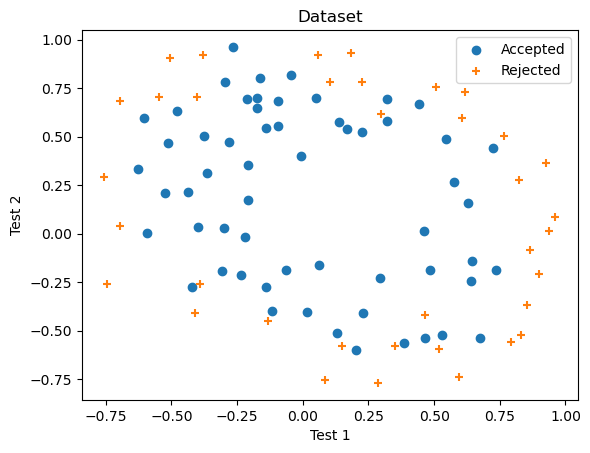

In [60]:
def plot_data():
    plt.scatter(x1[np.where(y == 1)], x2[np.where(y == 1)], label='Accepted')
    plt.scatter(x1[np.where(y == 0)], x2[np.where(y == 0)], marker= '+', label='Rejected')
    plt.title("Dataset")
    plt.xlabel("Test 1")
    plt.ylabel("Test 2")
    plt.legend()
    plt.show()
plot_data()

In [40]:
def map_feature(X1, X2):
    # Feature mapping function to polynomial features
    # Taken from Deeplearning.ai ML Practice Lab

    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [41]:
x = np.c_[x1, x2]
x = map_feature(x[:, 0], x[:, 1])

x_test = x[int(len(x)*0.8):]
y_test = y[int(len(y)*0.8):]
x = x[:int(len(x)*0.8)]
y = y[:int(len(y)*0.8)]

In [42]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [43]:
def compute_cost(x, y, w, b, lambda_ = 1):
    m,n = x.shape
    cost = 0
    for i in range(m):
        z = sigmoid(np.dot(x[i],w) + b)
        cost += -y[i] * np.log(z) - (1-y[i]) * np.log(1-z)

    cost, reg_cost = cost/m, 0.
    reg_cost = sum(np.square(w))
    return cost + (lambda_/(2*m)) * reg_cost

In [44]:
def compute_grad(x, y, w, b, lambda_ = None):
    m, n = x.shape
    dw, db = np.zeros(w.shape), 0.
   
    for i in range(m):
        yi = sigmoid(np.dot(x[i], w) + b)
        err = yi - y[i]

        for j in range(n):
            dw[j] += err * x[i, j]

        db += err

    dw, db = dw/m, db/m
    for j in range(n):
        dw[j] = dw[j] + (lambda_/m) * w[j]
        
    return dw, db

In [45]:
def gradient_descent(x, y, w_in, b_in, alpha, lambda_, iters, cost_func, grad_func):
    m = len(x)
    j_hist, w_hist = [], []

    for i in range(iters):
        dw, db = grad_func(x, y, w_in, b_in, lambda_)
        w_in -= alpha * dw
        b_in -= alpha * db

        if(i<100000):
            cost = cost_func(x, y, w_in, b_in, lambda_)
            j_hist.append(cost)

        if i% math.ceil(iters/10) == 0 or i == (iters-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(j_hist[-1]):8.2f}")

    return w_in, b_in, j_hist, w_hist

In [46]:
np.random.seed(1)
init_w = np.random.rand(x.shape[1]) - 0.5
init_b = 1.
iterations = 10000
alpha = 0.01
lambda_ = 0.01

w, b, j_hist, _ = gradient_descent(x, y, init_w, init_b, alpha, 0, iterations, 
                                   compute_cost, compute_grad)

Iteration    0: Cost     0.62
Iteration 1000: Cost     0.57
Iteration 2000: Cost     0.54
Iteration 3000: Cost     0.52
Iteration 4000: Cost     0.50
Iteration 5000: Cost     0.49
Iteration 6000: Cost     0.48
Iteration 7000: Cost     0.47
Iteration 8000: Cost     0.46
Iteration 9000: Cost     0.45
Iteration 9999: Cost     0.44


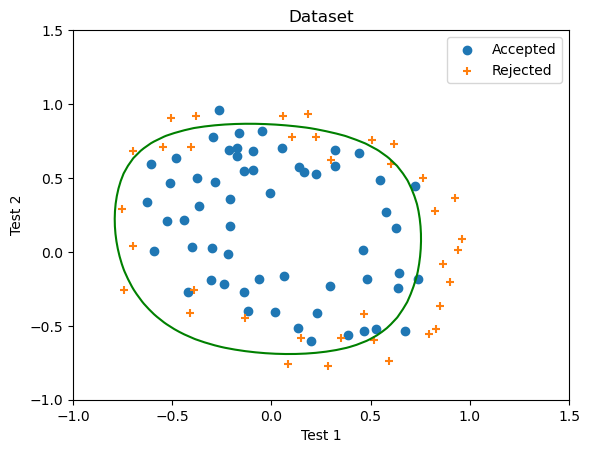

In [63]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)    

    plt.contour(u,v,z.T, levels = [0.5], colors="g")
    plot_data()

plot_decision_boundary(w, b, x, y)    

In [48]:
def predict(x, w, b):
    z = np.dot(x,w) + b
    p = sigmoid(z)
    pred = (p > 0.5).astype(int)
    return pred

In [49]:
def cal_accuracy(y_true, y_pred):
    return np.mean(np.equal(y_true, y_pred))

In [50]:
print("Train Accuracy : ", cal_accuracy(y, predict(x, w, b)))
print("Test Accuracy : ", cal_accuracy(y_test, predict(x_test, w, b)))

Train Accuracy :  0.8085106382978723
Test Accuracy :  0.5
